# Phase 2

## Downloading Dataset
Dataset gathered from `https://archive.ics.uci.edu/dataset/327/phishing+websites` and was collected by *PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.*

In [ ]:
import requests

url = 'https://archive.ics.uci.edu/static/public/327/data.csv'
response = requests.get(url)

with open('data.csv', 'wb') as f:
    f.write(response.content)

print("Download complete!")

Download complete!


## Reading Dataset into a **Data Frame** using pandas

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('data.csv')

# Displaying the first 5 rows
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Analyzing The Dataset
Analyzing it for *missing Data* and Checking the Dataset *Size* and *Data types*

In [ ]:
# Checking the size of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# Checking data types
print("\nData types:")
print(df.dtypes)

Dataset contains 11055 rows and 31 columns.
Checking for missing values:
having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0

### Just Renaming the Target Column for Clarity

In [ ]:
#Renaming our target column for extra clarity
df.rename(columns={'result': 'label'}, inplace=True)

df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,label
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Visualiation

### Counting The Phishing vs The Legitimate instances

label
 1    6157
-1    4898
Name: count, dtype: int64


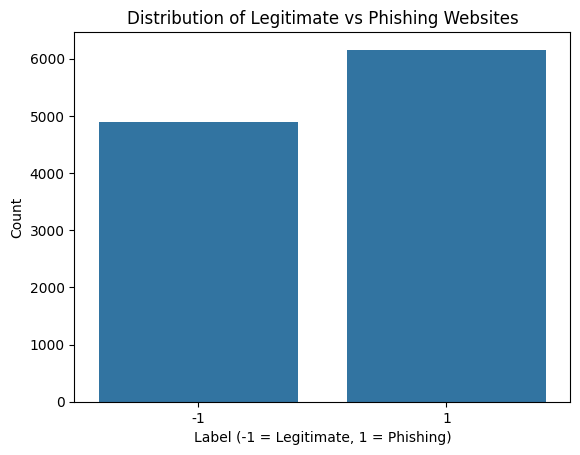

In [ ]:
# Count the instances of each class (phishing/legitimate)
print(df['label'].value_counts())

# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribution of Legitimate vs Phishing Websites')
plt.xlabel('Label (-1 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

### Visualizing using Heatmap

"Using a correlation heatmap, we identified that certain features such as 'having_ip_address' and 'domain_registration_length' had strong correlation with phishing labels, indicating their importance in detection. Additionally, highly correlated feature pairs like 'web_traffic' and 'page_rank' suggest possible feature redundancy."

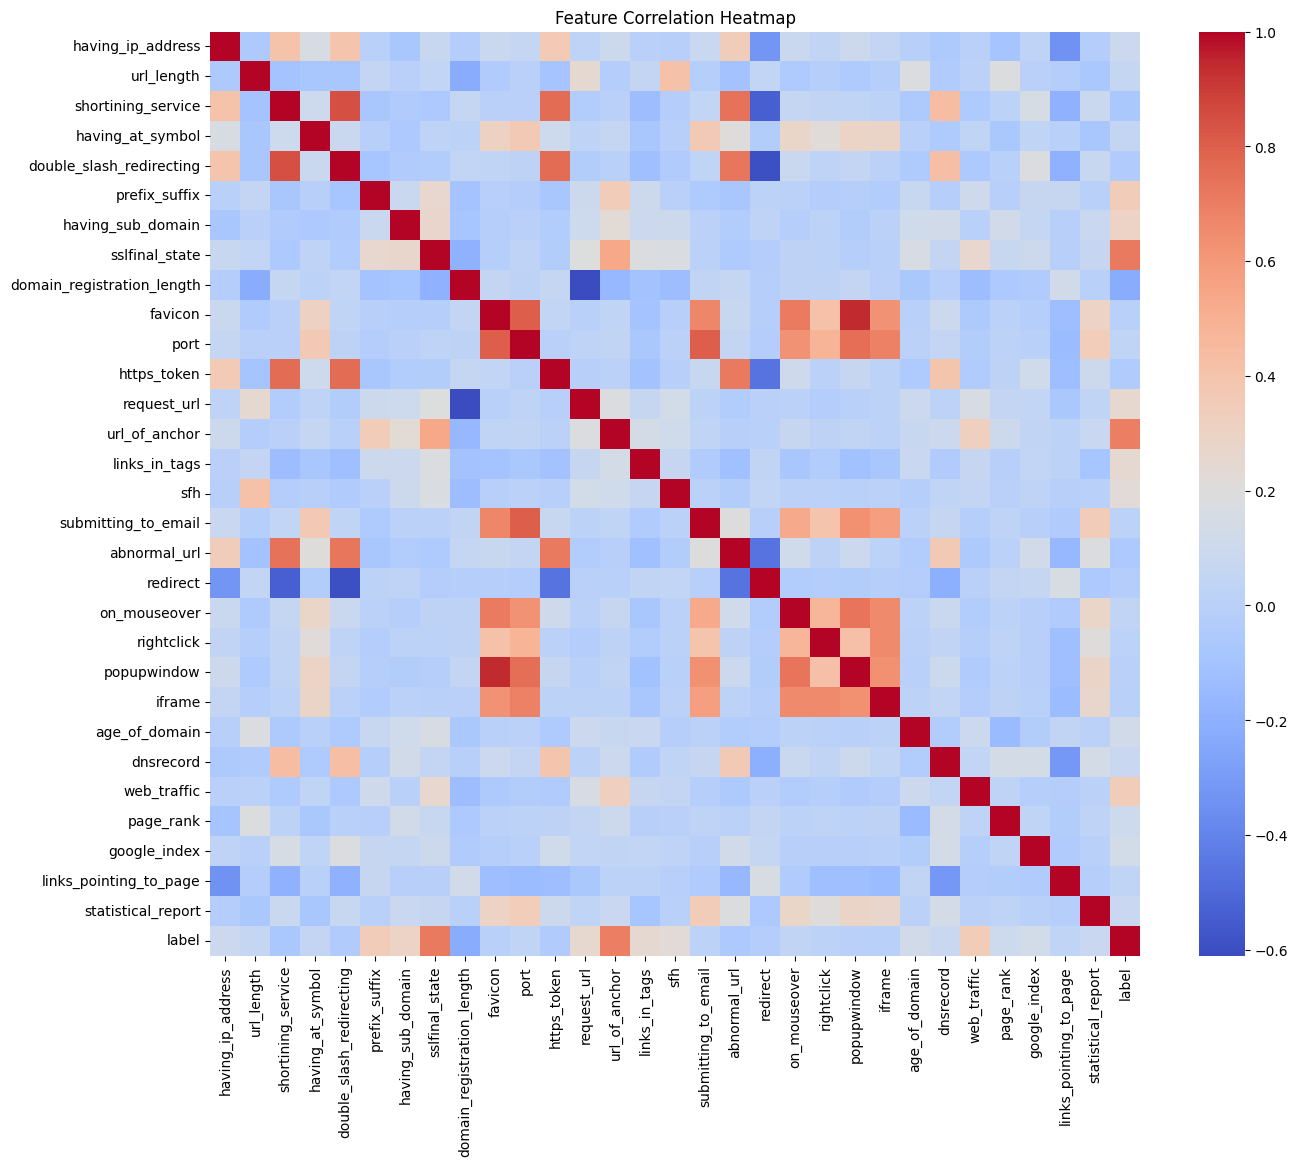

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### Visualizing using Histogram

1. This lets us visualize the spread of each feature across all websites.
2. We will use it to find which features might be powerful indicators of phishing.

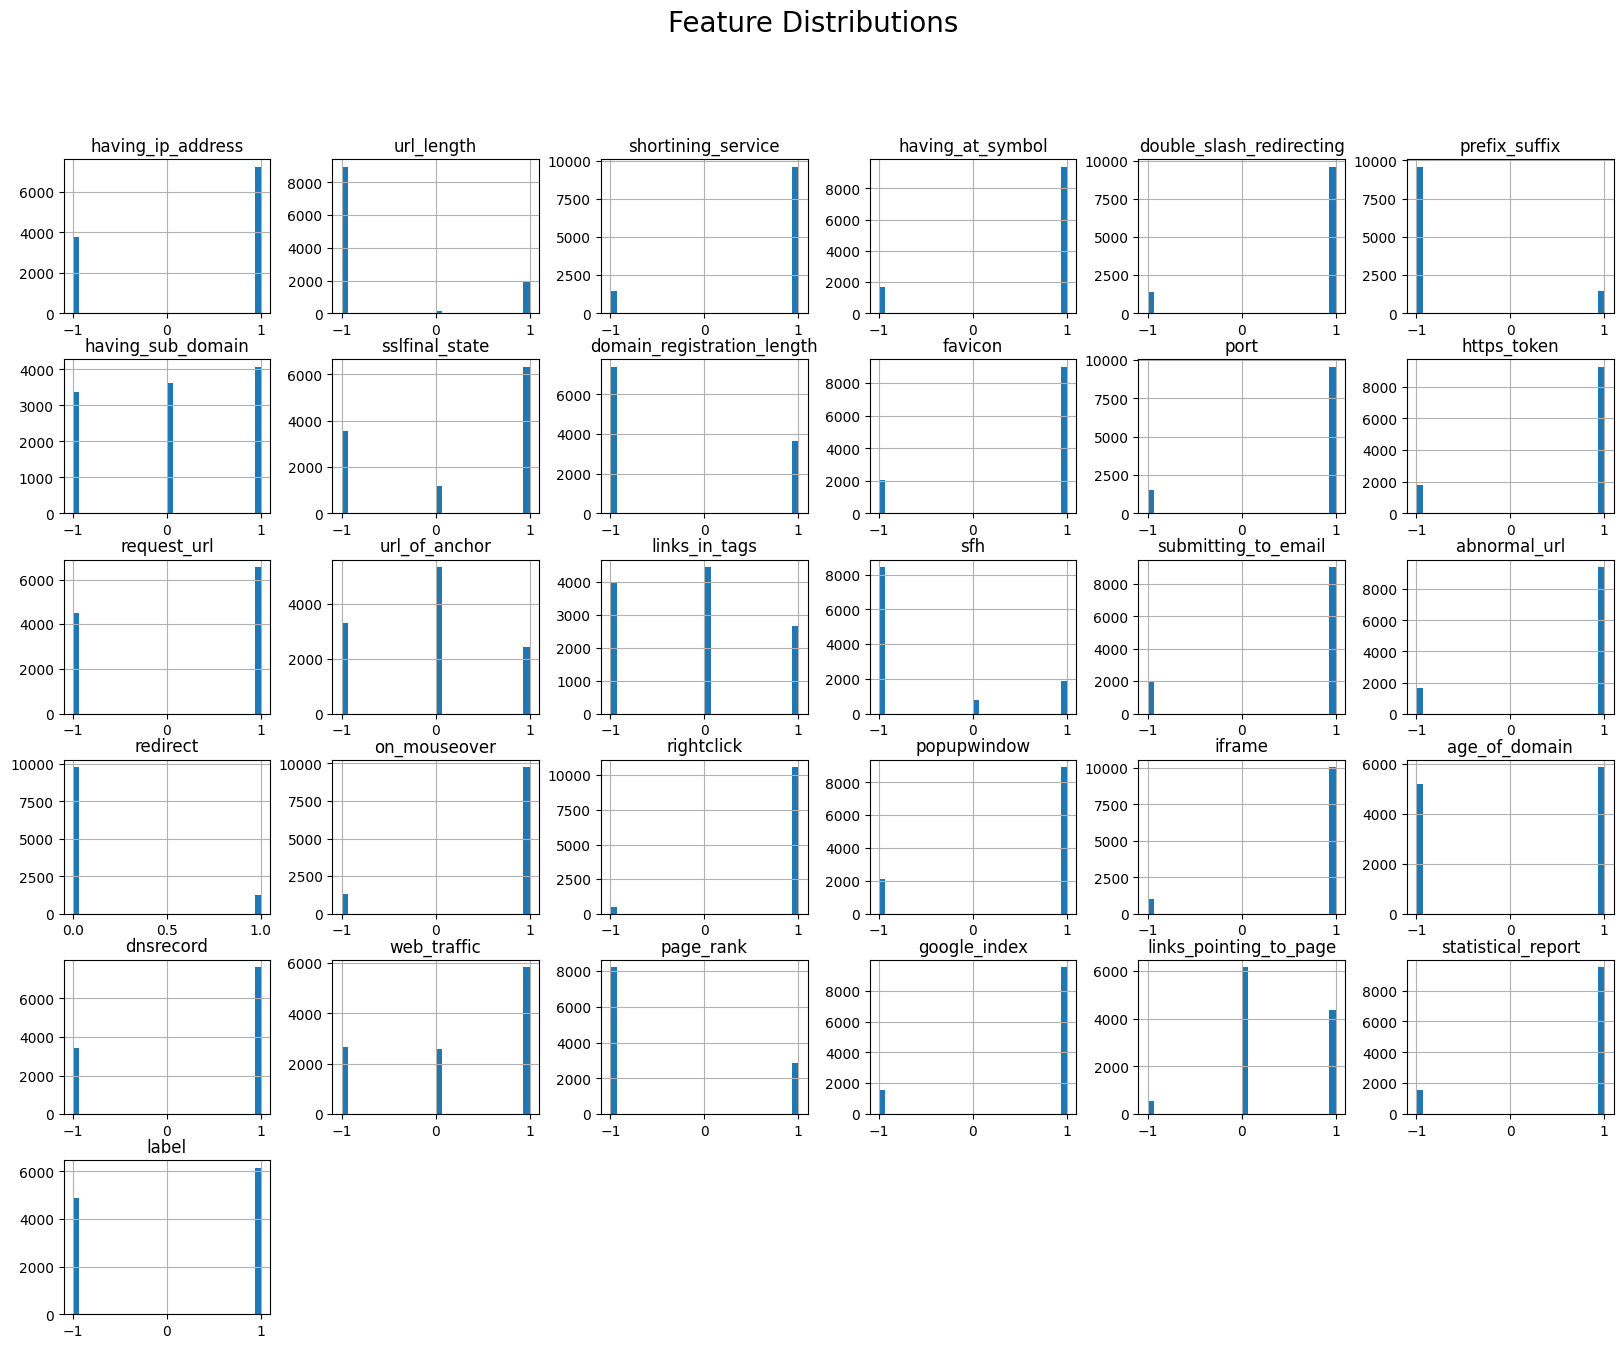

In [ ]:
# Plot histograms for all features
df.hist(figsize=(20,15), bins=30)
plt.suptitle('Feature Distributions', size=20)
plt.show()

## Spliting the Dataset into Train and Test (80% , 20%)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 8844
Testing samples: 2211


# Phase 3

## install tensorflow library

In [ ]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 538.3 kB/s eta 0:00:00
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.1.3 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.1.3 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.3 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.1.3 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.3 which is incompatible.


## It takes the 'label' column in your DataFrame df. Adds 1 to each value.Then does floor division (//) by 2 So it maps:   -1 → → *  because tensor flow DNN doesn't work with 1 and -1 and works with 1 and 0

In [ ]:
# Assuming df is your loaded dataframe
df['label'] = (df['label'] + 1) // 2

#### X becomes the DataFrame df without the 'label' column (i.e., only the feature columns)., y becomes just the 'label' column (your target variable for prediction)

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

#### train_test_split is a function from Scikit-learn that splits your dataset into training and testing subsets.

 X and y are split into:

    X_train and y_train → for model training

    X_test and y_test → for model evaluation

test_size=0.2 means 20% of the dataset will be for testing, and 80% for training.

random_state=42 ensures reproducibility — the same random split every time you run it.

stratify= ensures that the class distribution (proportion of 0s and 1s in y) is preserved in both the training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## Why DNN Is Suitable for Phishing Website Detection
1. Handles High-Dimensional, Structured Data Well:

- The phishing dataset includes many numerical and categorical features (like having_ip_address, URL_length, web_traffic, etc.).
- DNNs can learn complex patterns and interactions between features that traditional models may miss.
- Unlike models like decision trees that make splits on individual features, DNNs can combine multiple features to form non-linear decision boundaries.

2. Captures Non-Linear Relationships:

- Phishing indicators are often non-linearly related to the target (e.g., a legitimate site can have suspicious features too).
- DNNs, with multiple hidden layers and activation functions (like ReLU), can capture these complex, non-linear relationships effectively.

3. Feature Learning Capability:

- DNNs automatically learn internal feature representations from the input features, reducing the need for manual feature engineering.
- This is particularly useful when you have many weak features that together become strong signals.

4. Scalability and Flexibility:

- Can scale easily with more data or more features.
- You can tune architectures (e.g., deeper or wider layers) or even apply techniques like dropout, batch normalization, etc., to improve performance and reduce overfitting.

5. High Predictive Performance:

- DNNs generally achieve better accuracy and F1-scores than simpler models like logistic regression or decision trees when enough data and computing resources are available.

- Your notebook results (validation accuracy > 90%) support that the model performs well.

6. Supports Regularization and Optimization Techniques
DNNs allow integration of techniques like:

- Dropout layers – to reduce overfitting.
- Early stopping – to halt training when validation loss increases.
- Adaptive optimizers (e.g., Adam) – improve learning stability.
- These all help make DNNs more robust and generalizable.

7. Binary Classification Friendly:

- The sigmoid output layer and binary cross-entropy loss function make DNNs ideal for binary classification problems like phishing (legit vs phishing).

## This code builds and trains a neural network using TensorFlow Keras for a binary classification :


    Model Structure:
        Input layer: accepts 30 features.
        First hidden layer: 64 neurons, with ReLU activation.
        Second hidden layer: 32 neurons, also with ReLU activation.
        Output layer: 1 neuron with a sigmoid activation to output a probability between 0 and 1.

    Compilation:
        Optimizer: Adam, which adjusts the learning rate automatically.
        Loss function: Binary Crossentropy, because it's a two-class (binary) classification problem.
        Metric: Accuracy, to evaluate the model's performance.

    Training:
        Trains on X_train and y_train for 50 epochs.
        Uses 10% of the training data for validation to monitor overfitting.
        Processes data in batches of 32 samples at a time.

The history object stores training and validation performance over the epochs.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(30,)),           # Input layer (30 features)
    layers.Dense(64, activation='relu'), # Hidden layer 1
    layers.Dense(32, activation='relu'), # Hidden layer 2
    layers.Dense(1, activation='sigmoid') # Output layer (probability between 0 and 1)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,   # Use 10% of training data for validation
    epochs=50,              # Train for 50 epochs
    batch_size=32,          # Update weights every 32 samples
    verbose=1
)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8261 - loss: 0.3997 - val_accuracy: 0.9299 - val_loss: 0.1876
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9272 - loss: 0.1916 - val_accuracy: 0.9390 - val_loss: 0.1603
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9310 - loss: 0.1721 - val_accuracy: 0.9435 - val_loss: 0.1456
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9432 - loss: 0.1456 - val_accuracy: 0.9480 - val_loss: 0.1356
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9411 - loss: 0.1416 - val_accuracy: 0.9548 - val_loss: 0.1221
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9484 - loss: 0.1237 - val_accuracy: 0.9503 - val_loss: 0.1208
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9458 - loss: 0.1230 - val_accuracy: 0.9605 - val_loss: 0.1164
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9555 - loss: 0.1118 - val_accuracy: 0.

### First,it plots the training and validation accuracy across all epochs:

   ` history.history['accuracy'] : training accuracy.`
   
   ` history.history['val_accuracy']: validation accuracy. `

    It shows how well the model is learning and generalizing.

### Then, it plots the training and validation loss:

   `  history.history['loss']: training loss. `
    
   `  history.history['val_loss']: validation loss. `

    It shows how the model’s error changes during training.

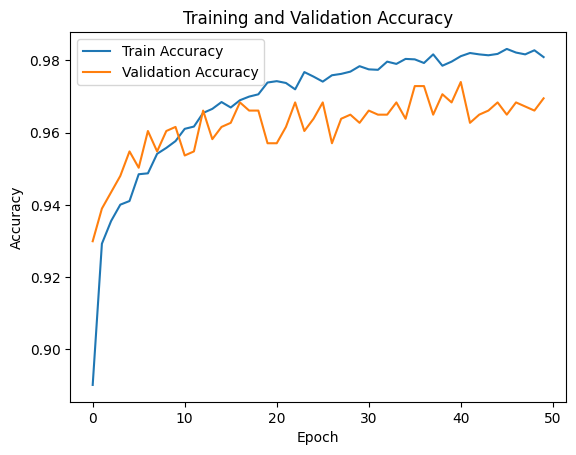

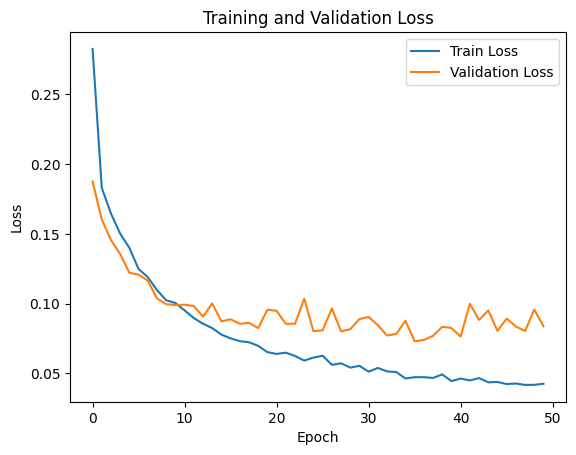

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - loss: 0.0660
Test Loss: 0.07918050140142441
Test Accuracy: 0.967887818813324


### This code evaluates the trained model on the test data:

     Predicts labels for X_test and converts probabilities to 0 or 1.

     Prints a detailed classification report (precision, recall, F1-score) .

     Plots a confusion matrix using Seaborn to visualize correct and incorrect predictions.

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       980
           1       0.97      0.97      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



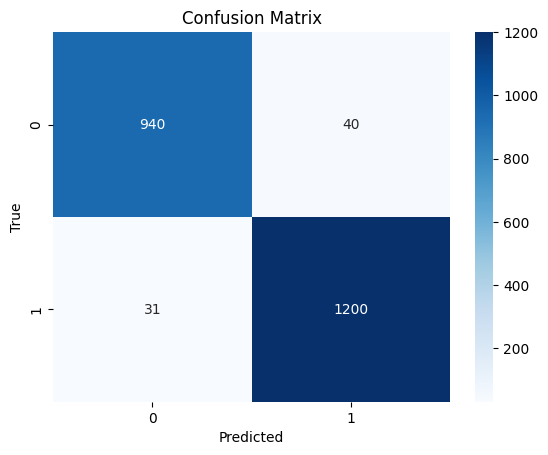

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Detailed classification report
print(classification_report(y_test, y_pred_labels))

# Confusion matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### This code defines and trains an optimized neural network for binary classification:


    The model has more neurons and dropout layers (30%) to reduce overfitting.

    It uses an Adam optimizer with a lower learning rate (0.0005) for smoother training.

    EarlyStopping is added to stop training early if validation loss doesn't improve for 5 epochs.

    The model trains on X_train with 10% validation split and up to 100 epochs, but early stopping will likely finish earlier.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the optimized model architecture
optimized_model = keras.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(128, activation='relu'),  # increased neurons
    layers.Dropout(0.3),                   # 30% dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')   # sigmoid for binary classification
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # smaller learning rate for stability

optimized_model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train the optimized model
optimized_history = optimized_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,  # larger number because early stopping will cut it early
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7522 - loss: 0.4833 - val_accuracy: 0.9390 - val_loss: 0.1799
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9107 - loss: 0.2272 - val_accuracy: 0.9412 - val_loss: 0.1625
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2049 - val_accuracy: 0.9446 - val_loss: 0.1520
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.2025 - val_accuracy: 0.9492 - val_loss: 0.1439
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.1686 - val_accuracy: 0.9480 - val_loss: 0.1343
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9262 - loss: 0.1741 - val_accuracy: 0.9480 - val_loss: 0.1344
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9368 - loss: 0.1638 - val_accuracy: 0.9469 - val_loss: 0.1259
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9365 - loss: 0.1510 - val_accu

### This plots the training and validation accuracy and loss over the epochs for the optimized model to visually check its performance and detect overfitting or underfitting.

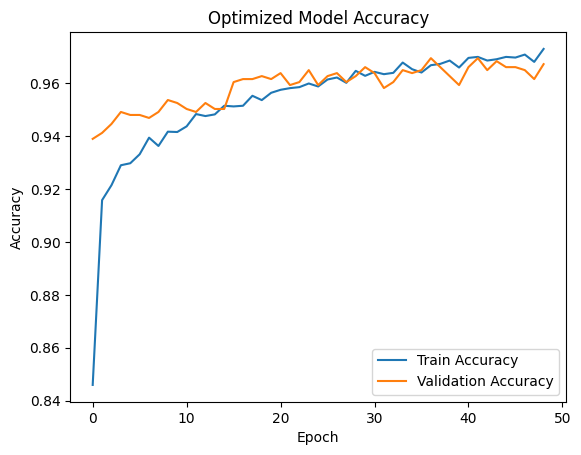

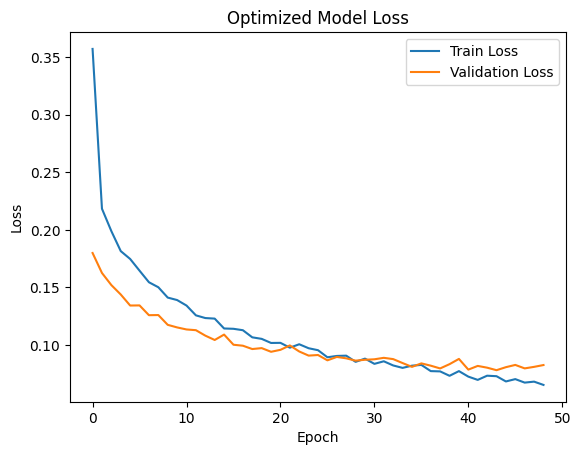

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(optimized_history.history['accuracy'], label='Train Accuracy')
plt.plot(optimized_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(optimized_history.history['loss'], label='Train Loss')
plt.plot(optimized_history.history['val_loss'], label='Validation Loss')
plt.title('Optimized Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 ### Evaluates the optimized model on the test set, predicts labels, prints a classification report, and plots a confusion matrix to analyze the model’s final performance.

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9661 - loss: 0.0692
Optimized Test Loss: 0.07904059439897537
Optimized Test Accuracy: 0.9642695784568787
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



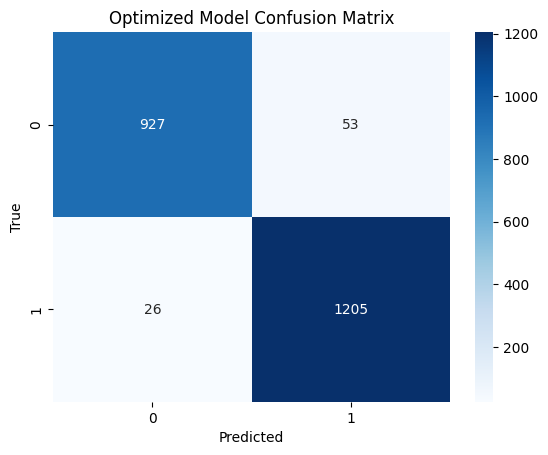

In [ ]:
# Evaluate on test set
opt_test_loss, opt_test_accuracy = optimized_model.evaluate(X_test, y_test)
print(f"Optimized Test Loss: {opt_test_loss}")
print(f"Optimized Test Accuracy: {opt_test_accuracy}")

# Predict labels
y_opt_pred = optimized_model.predict(X_test)
y_opt_pred_labels = (y_opt_pred > 0.5).astype(int).flatten()

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Optimized Model Classification Report:")
print(classification_report(y_test, y_opt_pred_labels))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_opt_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Optimized Model Confusion Matrix')
plt.show()

## compare accuracy between intial test and optimized test (yes the accuarcy dropped but we reduced the chances of over fitting)

In [ ]:
# compare accuracy
initial_test_accuracy = test_accuracy
optimized_test_accuracy = opt_test_accuracy

print(f"Initial Model Test Accuracy: {initial_test_accuracy*100:.2f}%")
print(f"Optimized Model Test Accuracy: {optimized_test_accuracy*100:.2f}%")

Initial Model Test Accuracy: 96.79%
Optimized Model Test Accuracy: 96.43%
